# Nivel de Figura vs. Nivel de Axes en Seaborn

![funciones_seaborn](./assets/funciones_seaborn.png)

**Nivel de Figura:**

- relplot
- displot
- catplot

**Nivel de Axes:**

- scatterplot
- lineplot
- histplot
- kdeplot
- rugplot
- stripplot
- swarmplot
- boxplot
- violinplot
- pointplot
- barplot

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df: pd.DataFrame = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


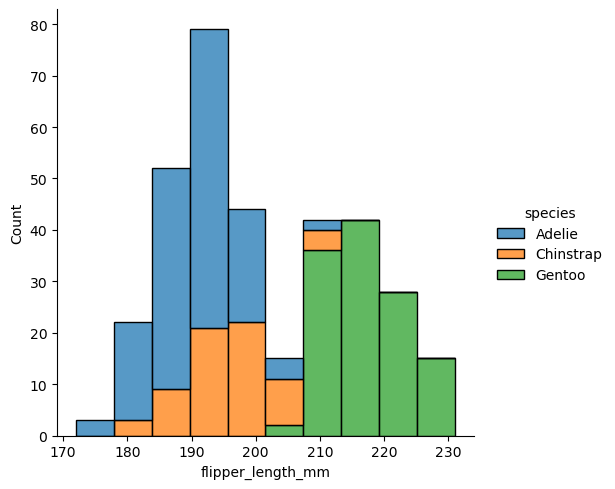

In [3]:
# Gráfico de alto nivel de ejemplo (displot es una figura)
sns.displot(
    df,
    x='flipper_length_mm',
    hue='species',
    multiple='stack'
)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

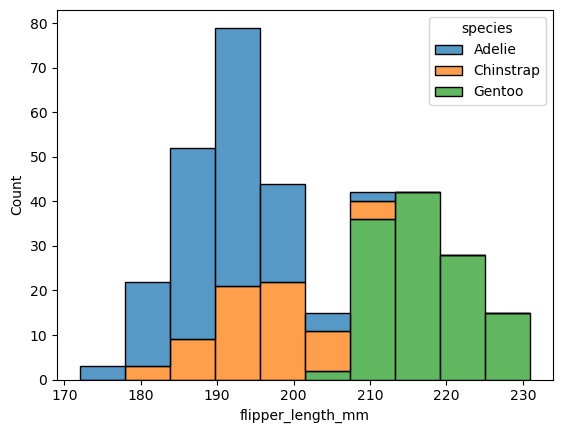

In [4]:
# Hacer el mismo gráfico pero a bajo nivel (histplot es un axes)
sns.histplot(
    df,
    x='flipper_length_mm',
    hue='species',
    multiple='stack'
)

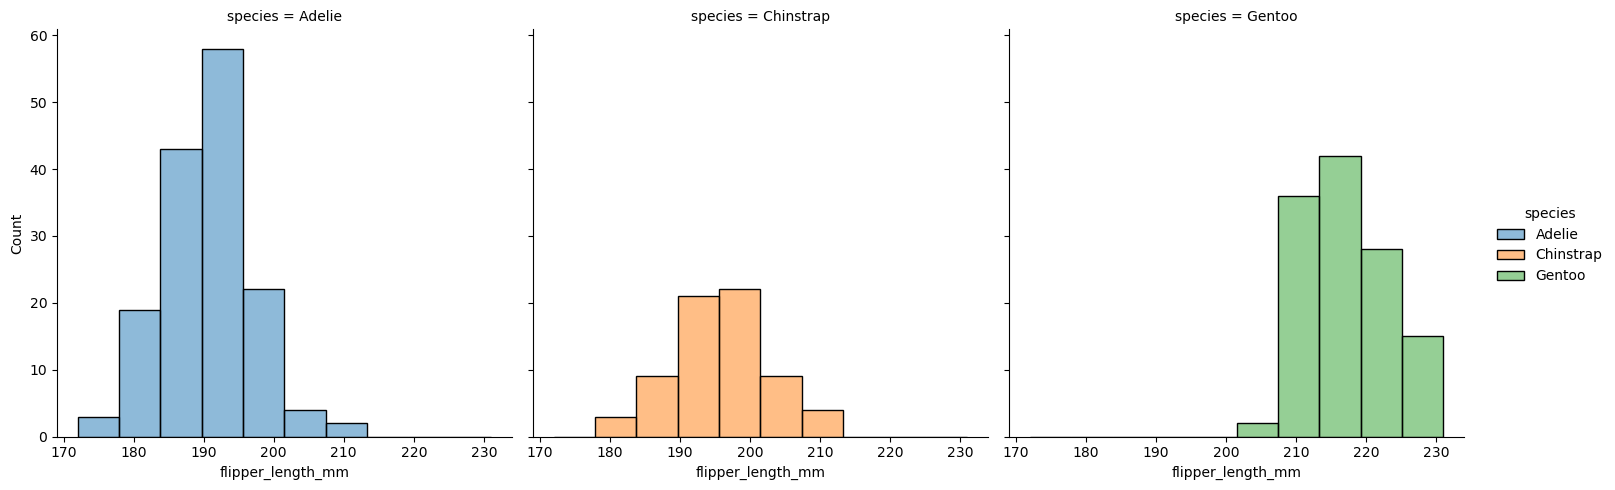

In [5]:
# Desapilar con función de alto nivel
sns.displot(
    df,
    x='flipper_length_mm',
    hue='species',
    col='species'
)

**NOTAS IMPORTANTES:**

- No se puede hacer esto último con funciones de bajo nivel, porque entonces se está trabajando con un axes y no una figura.

- Cuando se trabaja a nivel de la figura, no podemos acceder a todos los parámetros específicos de las funciones a nivel de axes.

- Las funciones a nivel de figura gestionan su propia figura completa, lo que significa que no se diseñaron para incorporarse en gráficos ya existentes, ya que controlan la inicialización de la figura y esto les permite implementar funcionalidades específicas (como colocar la leyenda fuera del gráfico).

- Cada función de alto nivel devuelve un objeto de tipo `Facetgrid`.

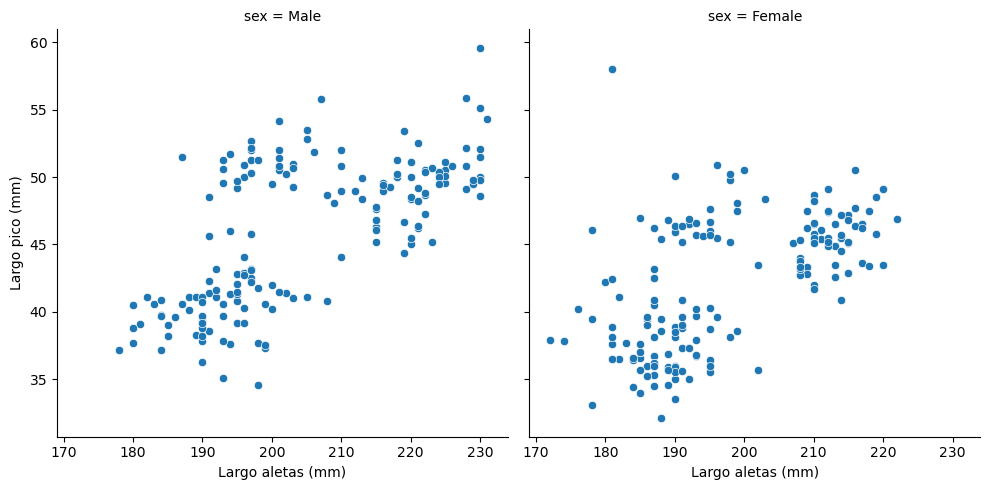

In [7]:
# Ejemplo de personalización con métodos de Facetgrid
graph: sns.FacetGrid = sns.relplot(
    df,
    x='flipper_length_mm',
    y='bill_length_mm',
    col='sex'
)
graph.set_axis_labels('Largo aletas (mm)', 'Largo pico (mm)')